In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline  

In [2]:
import scipy.io
data = scipy.io.loadmat('ex7data2.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


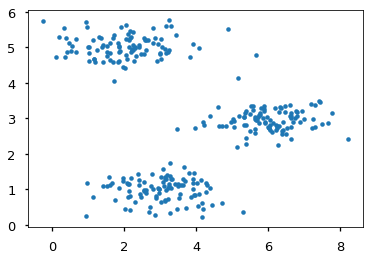

In [3]:
def plotData(X):
    plt.plot(X[:,0], X[:,1], '.');

X = data['X']
plotData(X)

In [4]:
def findClosestCentroids(X, centroids):
    K = len(centroids)
    idx = np.zeros([len(X), 1])
    for i in xrange(len(X)):
        dmin, dmin_j = -1, -1
        for j in xrange(len(centroids)):
            dst = np.sum((X[i,:] - centroids[j, :])**2)
#             print dst,
            if dmin > dst or dmin==-1:
                dmin = dst
                dmin_j = j
        idx[i, 0] = dmin_j
#         print '->', dmin_j
    return idx

In [5]:
K = 3
initial_centroids = np.array([[3,3],
                              [6,2],
                              [8,5]])
idx = findClosestCentroids(X, initial_centroids)
print idx[:3]   ### 0,2,1

[[0.]
 [2.]
 [1.]]


In [6]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros([K, n])
    for i in xrange(K):
        centroids[i] = X[np.where(idx==i)[0]].mean(axis=0)
    return centroids

In [7]:
centroids = computeCentroids(X, idx, K)
print centroids
### 2.428301, 3.157924
### 5.813503, 2.633656
### 7.119387, 3.616684

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [8]:
# import matplotlib.lines as lines
def plotProgresskMeans(centroids, previous, ax):
    plt.plot(centroids[:, 0], centroids[:, 1], 'rX');
    for i in xrange(len(centroids)):
        x1 = [centroids[i,0], previous[i,0]]
        x2 = [centroids[i,1], previous[i,1]]
        plt.plot(x1, x2, 'g');
#         line = lines.Line2D(x1, x2)
#         ax.add_line(line);

def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros([m, 1])
    
    if plot_progress:
        fig, ax = plt.subplots()
        plotData(X)
        plt.plot(centroids[:, 0], centroids[:, 1], 'rX');
        
    for i in xrange(max_iters):
        idx = findClosestCentroids(X, centroids)
        previous_centroids = centroids
        centroids = computeCentroids(X, idx, K)
        if plot_progress:
            plotProgresskMeans(centroids, previous_centroids, ax)
    return centroids, idx

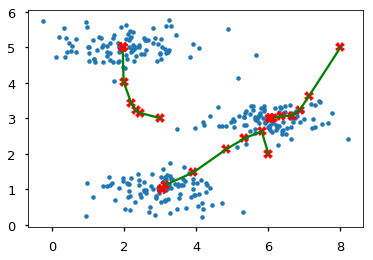

In [9]:
max_iters = 10
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

### Part 4: K-Means Clustering on Pixels

In [10]:
A = plt.imread('bird_small.png')
# plt.imshow(A);

In [11]:
X = A.reshape(A.shape[0]*A.shape[1], 3, order='F')

In [12]:
def kMeansInitCentroids(X, K):
    centroids = np.zeros([K, X.shape[1]])
    randidx = np.random.permutation(len(X))[:K]
    centroids = X[randidx]
    return centroids

In [13]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [24]:
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[idx.flatten().astype('int'), :]
X_recovered = X_recovered.reshape(A.shape[0], A.shape[1], 3, order='F')

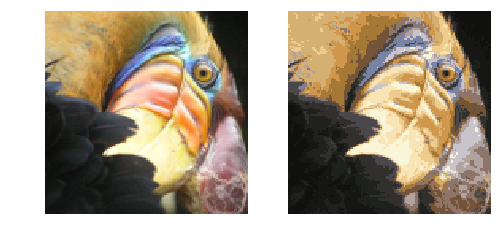

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(A);
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(X_recovered);
plt.axis('off');

### PCA

In [37]:
data = scipy.io.loadmat('ex7data1.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [38]:
X = data['X']

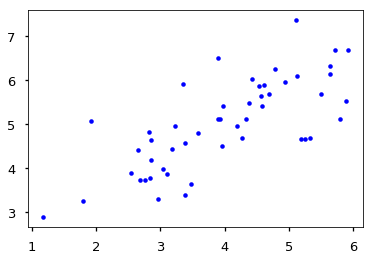

In [40]:
plt.plot(X[:, 0], X[:, 1], 'b.');

In [49]:
def featureNormalize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=1)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

def pca(X):
    m, n = X.shape
    U = np.zeros(n)
    S = np.zeros(n)
    Sigma = 1.0/m * np.dot(X.T, X)
    U, S, V = np.linalg.svd(Sigma)
    return U, S

In [50]:
X_norm, mu, sigma = featureNormalize(X)
pca(X_norm)

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]), array([1.70081977, 0.25918023]))

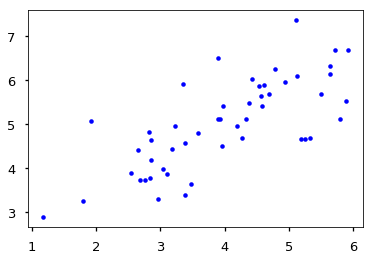

In [51]:
plt.plot(X[:, 0], X[:, 1], 'b.');